## 2. DataSet: Stanford Open Policing Project
([video](https://www.youtube.com/watch?v=hl-TGI4550M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=1))

https://openpolicing.stanford.edu/

In [3]:
import pandas as pd
pd.__version__

'0.25.1'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os
os.getcwd()

'D:\\DataScience\\Python\\NoteBooks'

In [7]:
# ri stands for Rhode Island
import pandas as pd
ri = pd.read_csv('police.csv')
ri.head()
#we = pd.read_csv('Data/weather.csv')
# ri stands for Rhode Island
ril = pd.read_csv('police.csv')

Before beginning your analysis, it's important that we familiarize ourselves with the dataset.

In [2]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [134]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


It looks like most of the columns have at least some missing values.

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns. In this case, the state and the county_name columns are non-relevant, since we only focus on data from Rhode Island.

In [135]:
# Examine the shape of the DataFrame
print(ri.shape)

(91741, 15)


In [136]:
# Drop the 'county_name' and 'state' columns
ri.drop('county_name', axis='columns', inplace=True)

In [137]:
# Examine the shape of the DataFrame
print(ri.shape)

(91741, 14)


- When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset. 
- During this course, the driver_gender column will be critical to many of our analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [138]:
# Count all observations with non-missing and missing 'driver_gender'
ri.driver_gender.count()

86406

In [139]:
ri.driver_gender.isnull().sum()

5335

In [142]:
# Drop all rows that are missing 'driver_gender'
# subset specifies the rows/column to look for null values
ri.dropna(subset=['driver_gender'], inplace=True)

In [143]:
ri.dropna(axis=1, inplace=True)

In [144]:
# Count the number of missing values in each column (again)
print(ri.isnull().sum())

stop_date             0
stop_time             0
driver_gender         0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64


In [145]:
# Examine the shape of the DataFrame
print(ri.shape)

(86406, 11)


- Observations:
  > We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

  > The data types of features were automatically inferred by pandas when reading in the .csv file. The data types currently in use are only object and bool. As data types affect which operations we can perform on a given Series, we should examine and fix data types in our dataset.

In [146]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
dtype: object

The is_arrested column currently has the object data type. We'll change the data type to bool, which is the most suitable type for a column containing True and False values. Fixing the data type will enable us to use mathematical operations on the is_arrested column that would not be possible otherwise.

In [147]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype(bool)
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
dtype: object

The date and time of each traffic stop are stored in separate columns, both of which are object columns.

stop_datetime
2005-02-01 01:55:00    False
2005-01-18 08:15:00    False
2005-01-23 23:15:00    False
2005-02-20 17:15:00    False
2005-03-14 10:00:00    False
                       ...  
2015-12-31 20:27:00    False
2015-12-31 20:35:00    False
2015-12-31 20:45:00    False
2015-12-31 21:42:00    False
2015-12-31 22:46:00    False
Name: search_conducted, Length: 86406, dtype: bool

In [148]:
ri.iloc[:, 0:4].head()

,stop_date,stop_time,driver_gender,driver_race
0,02-01-05,1:55,M,White
1,18-01-05,8:15,M,White
2,23-01-05,23:15,M,White
3,20-02-05,17:15,M,White
4,14-03-05,10:00,F,White


- We will combine them into a single column and then convert it to a pandas datetime format. 
- This datetime column will function as the Index of the dataFrame, that will make it easier to filter and plot it by date.

In [149]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

In [150]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [151]:
# Examine the data type of 'stop_datetime'
ri.stop_datetime.dtypes

dtype('<M8[ns]')

In [152]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object

In [153]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [154]:
# Examine the index
ri.index

DatetimeIndex(['2005-02-01 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-01-04 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2015-12-31 16:38:00', '2015-12-31 19:44:00',
               '2015-12-31 19:55:00', '2015-12-31 20:20:00',
               '2015-12-31 20:25:00', '2015-12-31 20:27:00',
               '2015-12-31 20:35:00', '2015-12-31 20:45:00',
               '2015-12-31 21:42:00', '2015-12-31 22:46:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86406, freq=None)

In [155]:
# Examine the columns ('stop_datetime' is no longer one of the columns)
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

Now that we have cleaned the dataset, we can begin analyzing it!

### Exploring the relationship between gender and policing

#### Does the gender of a driver have an impact on police behavior during a traffic stop? 

- In this topic, we explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!
- Before comparing the violations being committed by each gender, we should examine the violations committed by all drivers to get a baseline understanding of the data.

In [156]:
# Count the unique values in 'violation'
ri.violation.value_counts()

Speeding               48461
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [157]:
# Express the counts as proportions
ri.violation.value_counts(normalize=True)

Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

Interesting! More than half of all violations are for speeding, followed by other moving violations and equipment violations.

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations. In order to answer that, first we create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [158]:
ri[ri.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [159]:
ri[ri.driver_gender == 'F'].violation.value_counts()

Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64

In [160]:
# Compute the violations by male drivers (as proportions)
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [161]:
# Compute the violations by female drivers (as proportions)
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [162]:
# Alternative Method - At a glance give single view of driver_gender vs violations
ri.groupby(ri.driver_gender).violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [163]:
ri.groupby(["driver_gender", "violation"]).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

- **Analysis** 
  > - About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

#### Which gender is often found for speeding?
  > - When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

  > - First, we'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males. Then, for each gender, we'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [164]:
ri[ri.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [165]:
ri[ri.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [166]:
# Method-1
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [167]:
## Alternative Method-2
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [168]:
## ## Alternative Method-3
ri.groupby(ri.driver_gender).violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

#### Does gender affect who gets searched during a stop?
During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does the driver's gender affect whether their vehicle is searched? Let's calculate the percentage of all stops that result in a vehicle search, also known as the search rate.

In [169]:
# Check the data type of 'search_conducted'
ri.search_conducted.dtypes

dtype('bool')

In [170]:
# Check the data type of 'search_conducted'
ri.search_conducted.value_counts()

False    83210
True      3196
Name: search_conducted, dtype: int64

In [171]:
# Calculate the search rate by taking the mean
ri.search_conducted.mean()

0.036988172117677014

In [172]:
ri.groupby("driver_gender").search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

- Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor. For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations. 
- We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation.

In [173]:
ri.groupby(["violation", "driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

- During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk." 
- First, we should check the different types of activities carried out during a search.

#### Check the search_types activities and find why the search_type is missing so often?

In [187]:
ril.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [188]:
ril.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

- There were 161 cases where ONLY Protective Frisk was done. 
- In other cases, there were multiple actions taken, resulting in a comma-separated representation of those actions. We can collect all cases when drivers were frisked using a string function.


In [189]:
ril.search_type.str.contains("Protective Frisk").value_counts()

False    2922
True      274
Name: search_type, dtype: int64

In [190]:
ril.search_type.isin(["Protective Frisk"]).value_counts()

False    91580
True       161
Name: search_type, dtype: int64

In [194]:
# Check if 'search_type' contains the string 'Protective Frisk'
ril["Frisk"] = ril.search_type.str.contains("Protective Frisk", na=False)
ril.Frisk

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: Frisk, Length: 91741, dtype: bool

In [196]:
# Check data type
ril.Frisk.dtypes

dtype('bool')

In [197]:
# Compute 'Search_type' with both Protective Frisk + along with multiple violations.  
ril.Frisk.sum()

274

It looks like there were 303 drivers who were frisked. 

In [180]:
161 / (91580 + 161)

0.0017549405391264537

In [181]:
## This method tells you that it excluded the missing values
274 / (2922 + 274)

0.08573216520650813

- Are males frisked more often than females, perhaps because police officers consider them to be higher risk? 
- Next, we'll examine whether gender affects who is frisked.

In [200]:
searched = ril[ril.search_conducted == True] 

In [201]:
searched.Frisk.mean()

0.08573216520650813

In [203]:
ril.groupby("driver_gender").Frisk.mean()

driver_gender
F    0.001233
M    0.003895
Name: Frisk, dtype: float64

#### How does drug activity change by time of day?

In [204]:
ril.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
Frisk                    bool
dtype: object

In [205]:
ril.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [206]:
ril.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [207]:
ril.stop_date.str.cat(ril.stop_time, sep=' ')

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [208]:
comb = ril.stop_date.str.cat(ril.stop_time, sep=' ')

In [209]:
ril["stop_dt"] = pd.to_datetime(comb)

In [210]:
ril.dtypes

stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
Frisk                           bool
stop_dt               datetime64[ns]
dtype: object

In [211]:
ril.stop_dt.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_dt, dtype: int64

In [212]:
ril.stop_dt.dt.year.value_counts().sort_values().index[0]

2005

### How does drug activity change by time of day? 

In [213]:
ril.drugs_related_stop.dtype

dtype('bool')

In [214]:
ril.drugs_related_stop.mean()

0.008883705213590434

In [215]:
ril.groupby(ril.stop_dt.dt.hour).drugs_related_stop.mean()

stop_dt
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

In [216]:
# Alternate method
perhour = ril.stop_dt.dt.hour
ril.groupby(perhour).drugs_related_stop.mean()

stop_dt
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

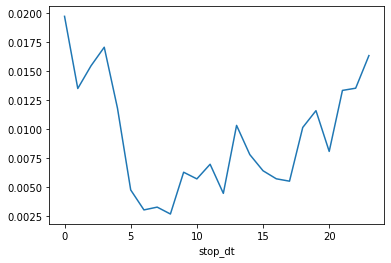

In [217]:
ril.groupby(perhour).drugs_related_stop.mean().plot()

### What is the mean stop_duration for each violation_raw?

In [218]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ril['stop_minutes'] = ril.stop_duration.map(mapping)

In [219]:
# matches value_counts for stop_duration
ril.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [ ]:
ril.groupby(ri.stop_duration).drugs_related_stop.value_counts(dropna=False)

In [222]:
ril.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [223]:
ril.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


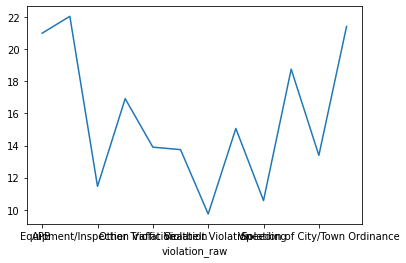

In [224]:
# what's wrong with this?
ril.groupby('violation_raw').stop_minutes.mean().plot()

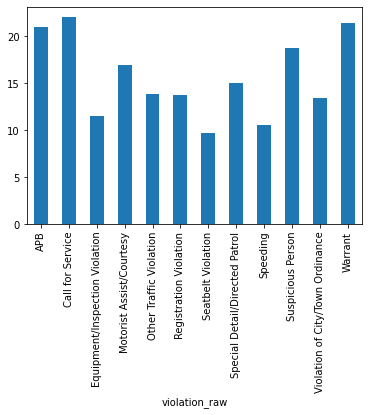

In [225]:
# how could this be made better?
ril.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

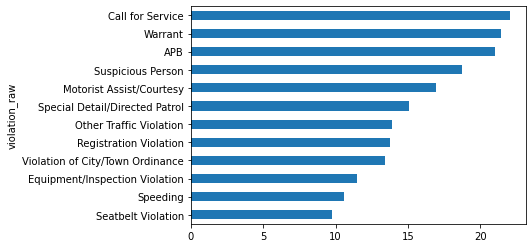

In [226]:
ril.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

### Compare the age distributions for each violation

In [227]:
# good first step
ril.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


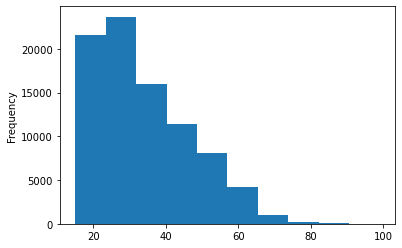

In [228]:
# histograms are excellent for displaying distributions
ril.driver_age.plot(kind='hist')

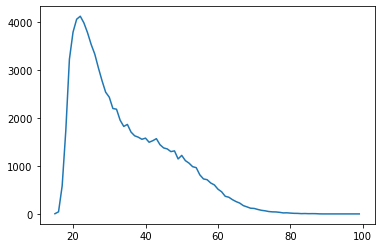

In [229]:
# similar to a histogram
ril.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B51BDDAE48>,
      dtype=object)

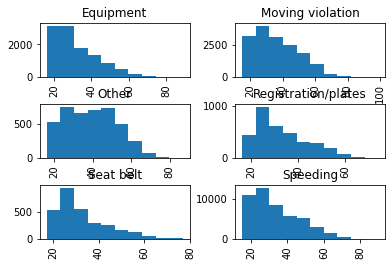

In [230]:
# can't use the plot method
ril.hist('driver_age', by='violation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B51ACE72C8>,
      dtype=object)

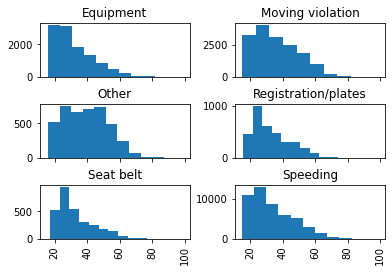

In [231]:
# what changed? how is this better or worse?
ril.hist('driver_age', by='violation', sharex=True)

In [232]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, sharey=True)

KeyError: 'Column not found: driver_age'

### Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [234]:
# appears to be year of stop_date minus driver_age_raw
ril.tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk,stop_dt,stop_minutes
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,False,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,False,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,False,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,2015-12-31 21:42:00,8.0
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,2015-12-31 22:46:00,8.0


In [235]:
ril['new_age'] = ril.stop_dt.dt.year - ril.driver_age_raw

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B520599508>,
      dtype=object)

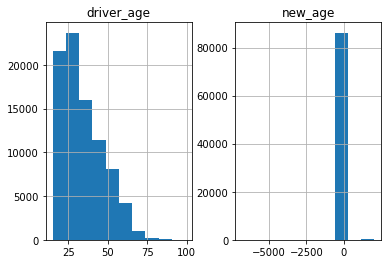

In [236]:
# compare the distributions
ril[['driver_age', 'new_age']].hist()

In [237]:
# compare the summary statistics (focus on min and max)
ril[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [238]:
# calculate how many ages are outside that range
ril[(ril.new_age < 15) | (ril.new_age > 99)].shape

(294, 19)

In [239]:
# raw data given to the researchers
ril.driver_age_raw.isnull().sum()

5327

In [240]:
# age computed by the researchers (has more missing values)
ril.driver_age.isnull().sum()

5621

In [241]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [242]:
# driver_age_raw NOT MISSING, driver_age MISSING
ril[(ril.driver_age_raw.notnull()) & (ril.driver_age.isnull())].head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk,stop_dt,stop_minutes,new_age
146,2005-10-05,08:50,NaN,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,False,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,False,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,NaN,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,False,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,NaN,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,False,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,NaN,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,False,2005-10-18 18:30:00,8.0,2005.0


In [243]:
# set the ages outside that range as missing
ril.loc[(ril.new_age < 15) | (ril.new_age > 99), 'new_age'] = np.nan

In [244]:
ril.new_age.equals(ril.driver_age)

True

### Visual exploratory data analysis ¶

- Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? 
- In this topic, we will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.
- When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this part, we'll find out whether the arrest rate varies by time of day.

In [245]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
dtype: object

In [246]:
ri["is_arrested"] = ri.is_arrested.astype(bool)

In [247]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.03389810892762077


In [248]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.047393
1     0.061428
2     0.062914
3     0.053221
4     0.074074
5     0.031915
6     0.014045
7     0.013498
8     0.020449
9     0.024703
10    0.025278
11    0.027037
12    0.032999
13    0.030100
14    0.032716
15    0.032307
16    0.030765
17    0.032757
18    0.043988
19    0.031506
20    0.041048
21    0.053795
22    0.043397
23    0.042825
Name: is_arrested, dtype: float64


In [249]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

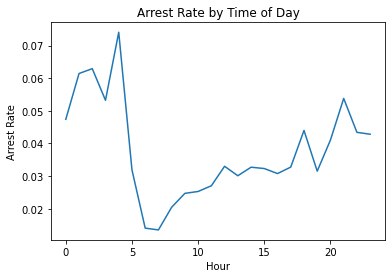

In [250]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

The arrest rate has a significant spike overnight, and then dips in the early morning hours.

- In a small portion of traffic stops, drugs are found in the vehicle during a search. 
- We'll assess whether these drug-related stops are becoming more common over time. 
- The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. 
- We'll calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time.

In [251]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())


stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008449
2012-12-31    0.010870
2013-12-31    0.011858
2014-12-31    0.013335
2015-12-31    0.010448
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [252]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
#pandas_profiling.ProfileReport(police)

prof = ProfileReport(ri)
prof.to_file(output_file='output.html')